In [53]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression

from strategy import Strategy
from simulator import Simulator

from abc import ABC, abstractmethod

from typing import Optional

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class MLStrategy(Strategy):
    def __init__(self):
        pass
    
    def compute_target_position(self, current_data: pd.DataFrame, current_position: float) -> Optional[float]:
        pass

In [32]:
data = pd.read_pickle('./data/simulator_data.pickle')

In [5]:
data[['price', 'volume']] = data[['price', 'volume']].astype('float32')

In [19]:
window_size = 20

In [22]:
rolling = [ [np.nan] * ( window_size + 1 - len(x) ) + x.to_list() for x in data.price.rolling(window_size + 1)]

In [24]:
data['row'] = rolling

In [30]:
rolling_df = pd.DataFrame.from_records(rolling)

In [34]:
data = data.reset_index().join(rolling_df)

In [36]:
data = data.dropna()

In [38]:
target = window_size

In [39]:
xs = list(range(window_size))

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
train_valid, test = data[data['index'] < '2021-10-01'], data[data['index'] >= '2021-10-01']
train, valid = train_test_split(train_valid, test_size = 0.3, random_state = 41)

In [43]:
lr = LinearRegression()

In [44]:
X_train = train[xs]
X_valid = valid[xs]
X_test = test[xs]

y_train = train[target]
y_valid = valid[target]
y_test = test[target]

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
train_preds = lr.predict(X_train)
valid_preds = lr.predict(X_valid)
test_preds = lr.predict(X_test)

In [78]:
display(y_train)

618408      2731.340088
109521      3663.199951
1159603     4178.819824
1365747     8560.759766
1323457     7348.080078
               ...     
250980      2326.280029
741366      6645.399902
847776      9689.501953
1704887    42852.261719
1869780    16451.669922
Name: 20, Length: 1375598, dtype: float64

In [80]:
display(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
618408,2733.139893,2722.860107,2734.590088,2735.669922,2735.239990,2755.892090,2733.500000,2732.560059,2731.071289,2722.620117,2754.280029,2723.610107,2737.469971,2724.356201,2733.712402,2723.689941,2721.600098,2732.459961,2724.300537,2733.120117
109521,3684.939941,3665.379883,3652.540039,3645.100098,3669.919922,3687.040039,3669.360107,3681.449951,3677.290039,3672.760010,3650.179932,3656.729980,3631.919922,3622.379883,3614.699951,3630.770020,3646.850098,3636.399902,3636.429932,3659.909912
1159603,4259.250000,4297.240234,4276.226562,4182.720215,4197.399902,4192.060059,4214.620117,4183.759766,4181.640137,4088.050049,4157.660156,4124.419922,4140.799805,4140.079102,4201.390137,4174.281738,4159.509766,4191.609863,4197.890137,4211.180176
1365747,8541.160156,8537.607422,8550.410156,8550.853516,8563.549805,8566.320312,8569.190430,8568.559570,8566.639648,8561.206055,8560.912109,8558.110352,8543.849609,8564.919922,8561.000000,8544.808594,8556.230469,8559.410156,8558.749023,8552.159180
1323457,7326.234863,7327.580078,7329.410156,7330.680176,7330.189941,7336.959961,7329.459961,7340.479980,7335.379883,7331.640137,7334.580078,7335.939941,7339.609863,7340.532227,7332.660156,7333.891602,7336.120117,7338.169922,7337.642578,7340.140137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250980,2312.399902,2292.340088,2439.820068,2318.860107,2323.620117,2307.540039,2346.750000,2346.129883,2338.939941,2289.199951,2292.060059,2282.300049,2303.419922,2414.080078,2319.399902,2295.479980,2302.320068,2418.909912,2331.129883,2306.840088
741366,6641.319824,6629.040039,6627.379883,6632.080078,6626.950195,6623.200195,6624.580078,6620.939941,6619.930176,6622.701172,6617.140137,6625.020020,6632.939941,6632.733887,6643.200195,6630.359863,6629.819824,6625.209961,6634.919922,6634.439941
847776,9703.320312,9703.146484,9670.730469,9671.219727,9681.019531,9701.269531,9685.490234,9679.559570,9711.719727,9690.112305,9688.200195,9689.309570,9686.580078,9720.000000,9688.459961,9703.950195,9684.750000,9682.030273,9698.599609,9686.080078
1704887,43368.609375,43330.871094,43347.078125,43281.589844,43309.820312,43348.769531,43273.960938,43256.105469,43154.660156,43160.019531,43197.722656,43043.269531,42875.441406,42900.300781,42880.078125,42808.839844,42811.921875,42909.734375,42825.570312,42775.789062


In [79]:
display(train_preds)

array([ 2729.91251616,  3648.8703206 ,  4198.05210635, ...,
        9689.42126376, 42820.94903563, 16476.9990701 ])

In [77]:
lr.coef_

array([ 0.00420273, -0.00451659, -0.00266555, -0.00572605,  0.00390364,
        0.00369524, -0.00220751,  0.00717563,  0.00065827,  0.00356256,
        0.0048636 ,  0.01460232, -0.00225902,  0.00409535,  0.01572608,
        0.0309756 ,  0.0637304 ,  0.13741569,  0.2448014 ,  0.47795525])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [49]:
def eval_preds(true, preds):
    print(f'r2: {round(r2_score(true, preds), 4)}')
    print(f'rmse: {round(mean_squared_error(true, preds)**0.5, 4)}')
    print(f'mae: {round(mean_absolute_error(true, preds), 4)}')

In [ ]:
def plot_preds(df):
    pass

In [50]:
eval_preds(y_train, train_preds)

r2: 1.0
rmse: 47.5808
mae: 25.4162


In [51]:
eval_preds(y_valid, valid_preds)

r2: 1.0
rmse: 47.3384
mae: 25.381


In [52]:
eval_preds(y_test, test_preds)

r2: 1.0
rmse: 32.116
mae: 19.9199


In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(train['index'], y_train, size=0.1)
sns.scatterplot(train['index'], train_preds, size=0.1)

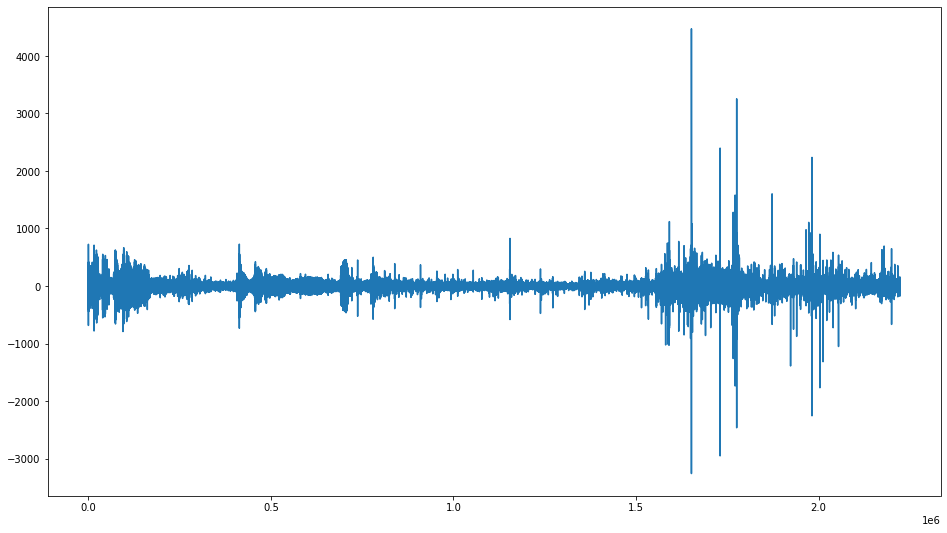

In [86]:
plt.figure(figsize=(16, 9))
plt.plot(data['price'].diff())

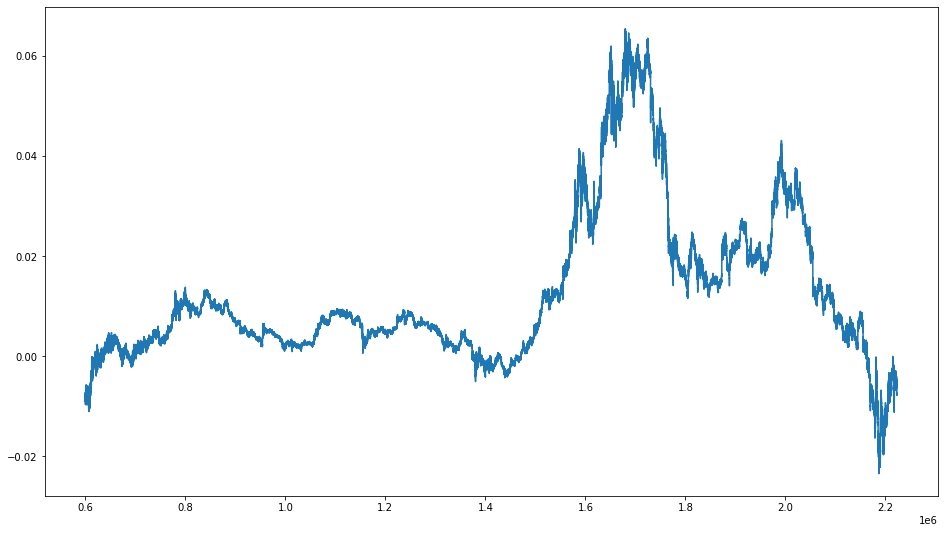

In [108]:
plt.figure(figsize=(16, 9))
plt.plot(data['price'].diff().rolling(600000).mean())

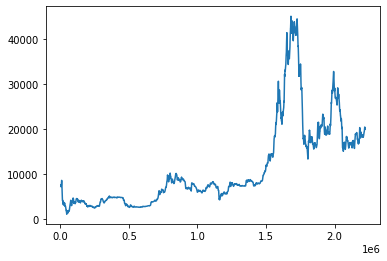

In [99]:
plt.plot(data['price'].rolling(24 * 60 * 2).mean())

In [88]:
display(data['price'].diff().head(20))

20       NaN
21   -102.99
22      0.32
23    121.80
24   -148.52
25    182.31
26   -130.18
27      2.89
28      0.34
29     -5.52
30     73.93
31    -52.77
32    155.42
33   -166.10
34    -28.60
35    137.20
36      6.96
37   -168.83
38     18.59
39     22.64
Name: price, dtype: float64